In [26]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import math


df_scores = pd.read_csv("../output/model_comparisons.csv")
df_scores = df_scores.loc[~df_scores["is_random"]]
df_scores = df_scores.drop(columns=["is_random"])

#trash all topics separate
df_scores = df_scores[df_scores["Name"].str.contains("topics_separate=False")]

# Used to extract best models for comparison to reasonability paper
#df_scores = df_scores[~df_scores["Name"].str.contains("wo_metadata=False")] 
#df_scores = df_scores[df_scores["Name"].str.contains("sampling=down")] 
#df_scores = df_scores[df_scores["Name"].str.contains("ratio=0.3")] 


#print(df_scores.head(10).to_string())

# Append ratio column 
pref = "_ratio="
df_scores["ratio"] = df_scores['Name'].apply(lambda x: x[(x.find(pref)+len(pref)):(x.find(pref)+len(pref)+3)])
#print(df_scores["Name"].iloc[0])
df_scores["ratio"] = df_scores["ratio"].astype(float)


def annot_max(x,y, ax=None, do_max=True):
    xmax = x[np.argmax(y)] if do_max else x[np.argmin(y)]
    
    ymax = y.max() if do_max else y.min()
        
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(1.3,0.75), **kw)


In [27]:
print(df_scores["ratio"].unique())
print(len(df_scores[df_scores["ratio"] ==0.2]))
print(df_scores["Name"].iloc[0])

[0.5 0.3 0.2]
480
xgboost_norm=0_weighted_title_prepend_sampling=up_topics_separate=False_predict=class_mapping=opposite_ratio=0.5_wo_metadata_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False


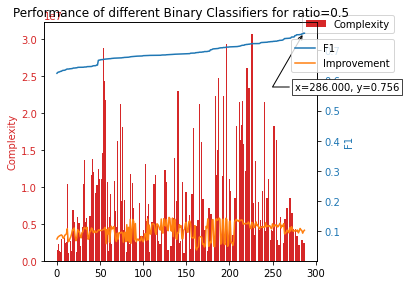

Best run: xgboost_norm=1_weighted=False_title_prepend_sampling=none_topics_separate=False_predict=class_mapping=clip_ratio=0.5_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.7563572301477867


<Figure size 432x288 with 0 Axes>

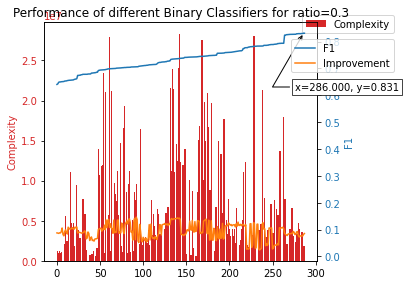

Best run: xgboost_norm=0_weighted=False_title_prepend_sampling=none_topics_separate=False_predict=class_mapping=clip_ratio=0.3_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.8311398793015617


<Figure size 432x288 with 0 Axes>

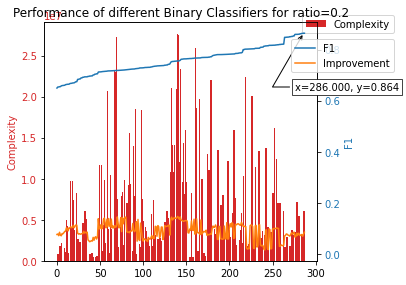

Best run: xgboost_norm=1_weighted=False_title_prepend=False_sampling=up_topics_separate=False_predict=class_mapping=opposite_ratio=0.2_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.8639222719733531
Binary Classifiers


,Name,Mean score,Best score,Mean improvement
14,ratio=0.2,0.756215,0.863922,0.089406
16,wo_metadata=False,0.750458,0.863922,0.114774
9,sampling=none,0.750022,0.863334,0.085849
4,weighted=False,0.747189,0.863922,0.083300
7,sampling=up,0.746189,0.863922,0.096592
17,requirements=True,0.736538,0.863922,0.081656
13,ratio=0.3,0.735942,0.831140,0.094313
6,title_prepend=False,0.728716,0.863922,0.095314
11,mapping=clip,0.728252,0.863922,0.095120
1,norm=1,0.727919,0.863922,0.094866


<Figure size 432x288 with 0 Axes>

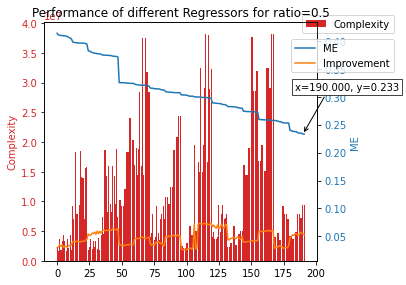

Best run: xgboost_norm=2_weighted=False_title_prepend=False_sampling=none_topics_separate=False_predict=ratio_mapping=clip_ratio=0.5_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.2332187117014044


<Figure size 432x288 with 0 Axes>

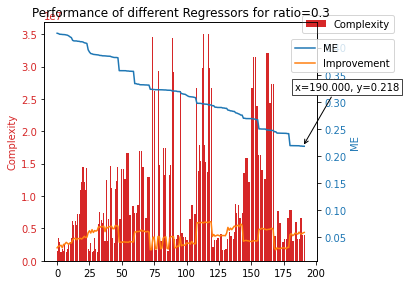

Best run: xgboost_norm=2_weighted=False_title_prepend_sampling=none_topics_separate=False_predict=ratio_mapping=opposite_ratio=0.3_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.2182022054761954


<Figure size 432x288 with 0 Axes>

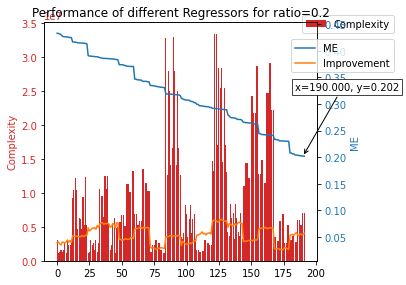

Best run: xgboost_norm=2_weighted=False_title_prepend=False_sampling=none_topics_separate=False_predict=ratio_mapping=clip_ratio=0.2_wo_metadata=False_new_reactions=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
0.2020095023817877
Regressors


,Name,Mean score,Best score,Mean improvement
9,sampling=none,0.273468,0.202010,0.053229
4,weighted=False,0.283564,0.202010,0.046541
16,wo_metadata=False,0.303527,0.202010,0.063571
17,requirements=True,0.308301,0.202010,0.046466
12,ratio=0.5,0.313499,0.233219,0.047476
6,title_prepend=False,0.316000,0.202010,0.051679
0,norm=0,0.316497,0.202502,0.051542
10,mapping=opposite,0.316734,0.202010,0.051297
11,mapping=clip,0.316777,0.202010,0.051391
1,norm=1,0.316844,0.203396,0.051339


<Figure size 432x288 with 0 Axes>

In [30]:
params = {
    # normalised: 0 = only "abs", 1 = only "norm", 2 = norm and abs
    "norm": [0,1,2],
    # weighted_vals: whether votes should be weighted by comment score
    "weighted": [True, False],
    # title_prepend: whether to use the title prepended or standalone dataset
    "title_prepend": [True,False ],
    # sampling_vals: which type of sampling should be done ("up", "down", "none")
    "sampling": ["up", "down", "none"],
    # if each topic should be analysed separately
    "topics_separate": [False],
    # should we predict "class" (classification for binary) or "ratio" (regression for AHR)
    "predict": ["class","ratio", ],
    # should we "clip" negative votes or map them to the "opposite"
    "mapping": ["opposite", "clip"],
    # which most extreme AHR or YTA_ratio we want to predict 0.3, 0.2, 0.1, 0.05
    "ratio": [0.5,0.3, 0.2], #0.5,0.3, 0.2,
    # wheter we should include metadata columns (e.g. post_score, account_karam, link_karma) set MANUALLY
    "wo_metadata": [True, False],
    # wheter we should use the old or new reactions (reactions_YTA, NTA)
    "new_reactions": [False],
    "use_liwc": [True],  # wheter we use liwc features
    "use_mf": [True],  # whether we use moral foundation features
    "requirements": [True, False],
}
    
df_reg = df_scores.loc[df_scores["is_regression"]]
df_bin = df_scores.loc[~df_scores["is_regression"]]

df_reg = df_reg.sort_values(by='Score', ascending=False)
df_bin = df_bin.sort_values(by='Score', ascending=True)


for df_iter in [df_bin, df_reg]:
    clf_type = "Regressors" if df_iter.iloc[0]["is_regression"] else "Binary Classifiers"
    for rto in params["ratio"]:
        df = df_iter.loc[df_iter["ratio"]==rto]
        if len(df)==0:
            continue
            
        
        #x_ticks = df["Name"]
        x_loc = range(len(df))
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_ylabel('Complexity', color=color)  # we already handled the x-label with ax1
        ax1.bar(x_loc, df["Complexity"], color=color, )
        ax1.tick_params(axis='y', labelcolor=color)
        #ax1.set_xticks(x_loc)
        #ax1.set_xticklabels(x_ticks, rotation = 90)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('ME' if df.iloc[0]["is_regression"] else "F1", color=color)
        ax2.plot(x_loc, df["Score"], color='tab:blue',)
        ax2.plot(x_loc, df["Improvement"], color='tab:orange')
        ax2.tick_params(axis='y', labelcolor=color)
        annot_max(x_loc, df["Score"], ax=ax2, do_max = not df.iloc[0]["is_regression"])
        
        ax1.legend(['Complexity'], bbox_to_anchor=(1.3, 1.05))
        ax2.legend(['ME' if df.iloc[0]["is_regression"] else "F1", 'Improvement'], bbox_to_anchor=(1.3, 0.95))
        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        plt.title(f"Performance of different {clf_type} for ratio={rto}")
        plt.show()
        plt.savefig(f'{clf_type}_ratio={rto}.png')
        print(f"Best run: {df['Name'].iloc[len(df)-1]}, \n{df['Score'].iloc[len(df)-1]}")
        plt.clf()
    
    
    param_impact = []
    for k in params:
        for v in params[k]:
            #which features we ignore
            if k in ["predict", "use_liwc", "use_mf", "new_reactions", "topics_separate"]:
                continue
                
            
            if k == "requirements":
                param_str = f"{k}"
                df_tmp = df_iter[df_iter["Name"].str.contains("post_score': 10")] if v else df_iter[df_iter["Name"].str.contains("post_score': 0")]
                

            elif type(v) == bool:
                param_str ="_"+k
                if not v:
                    param_str+="=False"
                    df_tmp = df_iter[df_iter["Name"].str.contains(param_str)]
                else:
                    param_str+="_"
                    df_tmp = df_iter[df_iter["Name"].str.contains(param_str)]
            else:
                param_str = f"_{k}={v}_"
                df_tmp = df_iter[df_iter["Name"].str.contains(param_str)]
                

            best_score = df_tmp["Score"].min() if df.iloc[0]["is_regression"] else df_tmp["Score"].max()
            #worst_score = df_tmp["Score"].max() if df.iloc[0]["is_regression"] else df_tmp["Score"].min()
            
            
            if param_str[0]=="_":
                param_str =param_str[1:]
            if param_str[-1]=="_":      
                param_str =param_str[:-1]
            if "requirements" in param_str:
                param_str+="="+str(v)
            
            param_impact.append([param_str, df_tmp["Score"].mean(),best_score, df_tmp["Improvement"].mean()])
            

    df_impact = pd.DataFrame(param_impact, columns=["Name", "Mean score", "Best score", "Mean improvement"])
    df_impact = df_impact.sort_values(by='Mean score', ascending=df.iloc[0]["is_regression"])
    print(clf_type)
    display(HTML(df_impact.to_html()))

In [5]:
# INSPECT FEATURES

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tune_sklearn import TuneGridSearchCV
from sklearn import preprocessing
import sys
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn import metrics
import json
import multiprocessing
import itertools as it
from tqdm import tqdm

TRIAL_RUN = False
OUTPUT_DIR = "./output/"
DATASETS_DIR = "../datasets/"




def get_data(params):
    prepend_csv = "prepend_done.csv"
    standalone_csv = "standalone_done.csv"

    if params["title_prepend"]:
        df = load_wo_cols(DATASETS_DIR+prepend_csv, params)
    else:
        df = load_wo_cols(DATASETS_DIR+standalone_csv, params)

    if params["new_reactions"]:
        new_react = "id_to_reactions_new.csv"
        df_reactions = pd.read_csv(DATASETS_DIR+new_react)
        df = df.merge(df_reactions, left_on="post_id", right_on="post_id",
                      validate="1:1", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

    if params["norm"] < 2:
        df = df[df.columns.drop(
            list(df.filter(regex="_abs" if params["norm"] == 1 else "_norm")))]

    keys = ["info", "yta", "nah", "esh", "nta"]
    weight = "weighted_" if params["weighted"] else ""
    values = ["reactions_"+weight+k.upper() for k in keys]
    acros = dict(zip(keys, values))

    dfs = []
    if params["topics_separate"] > 0:

        topic_min = df["topic_nr"].min()
        topic_max = df["topic_nr"].max()
        #print(f"Data split by topic ({topic_min}, {topic_max})")

        for i in range(topic_min, topic_max+1):
            dfs.append(df.loc[df["topic_nr"] == i])
    else:
        dfs = [df]


    return dfs, acros


def load_wo_cols(path, params, remove_cols=[], verbose=False):
    cols_to_remove = ["post_text", "Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 0.1",
                      "Unnamed: 0.1.1", "liwc_post_id", "foundations_post_id",
                      "foundations_title_post_id", "liwc_title_post_id", "post_created_utc"]+remove_cols
    metadata = ["speaker_account_comment_karma", "post_num_comments", "speaker_account_age",
                "speaker_account_link_karma", "post_ups", "post_downs", "post_score", "reactions_is_devil", "reactions_is_angel","post_ratio"]
    # removed "post_ratio" from metadata b.c. used for weights

    removed = []
    df = pd.read_csv(path, nrows=10)
    cols_to_read = list(df.columns)

    # remove metadata
    if params["wo_metadata"]:
        cols_to_remove = cols_to_remove+metadata

    if params["new_reactions"]:
        cols_to_remove = cols_to_remove + \
            list(filter(lambda x: "reaction" in x and not "reaction_is" in x, cols_to_read))

    # remove liwc
    if not params["use_liwc"]:
        cols_to_remove = cols_to_remove + \
            list(filter(lambda x: "liwc_" in x, cols_to_read))

    # remove moral foundations
    if not params["use_mf"]:
        cols_to_remove = cols_to_remove + \
            list(filter(lambda x: "foundations_" in x, cols_to_read))

    # post requirements setup
    cols_to_remove = [
        x for x in cols_to_remove if x not in list(params["requirements"].keys())]

    if verbose:
        print(cols_to_read)
    for col in cols_to_remove:
        if col in cols_to_read:
            cols_to_read.remove(col)
            removed.append(col)

    #print(f"Removed {removed} from {path.split('/')[-1]}")
    #print("ONLY USING 10k lines")
    df = pd.read_csv(path, usecols=cols_to_read,nrows = 100000 if TRIAL_RUN else None)

    # delte posts that don't meet requirements
    nr_rows_pre_req = len(df)
    for k, v in params["requirements"].items():
        df = df.loc[(df[k] >= v), :]
    # remove cols required for "requirements"
    if params["wo_metadata"]:
        to_drop = set(list(params["requirements"].keys()))
        in_list = set(list(df.columns))
        will_drop = list(to_drop.intersection(in_list))
        df = df.drop(columns=will_drop)
        removed += will_drop
        
        
    
    # print(
    #    f"Removed {int(100*(nr_rows_pre_req-len(df))/len(df))}% due to requirements, Now {len(df)} posts remain.")
    # Check values in df
    # df.describe().loc[['min','max']].to_csv("min_max.csv",index=False)
    return df


def sampling(X_train, y_train, params, indices=[], verbose=False):
    df_len_old = len(X_train)
    if verbose:
        print(f"{params['sampling']}-sampling for {params['predict']}")

    if params["sampling"] == "none":
        X_train_ret = X_train
        y_train_ret = y_train

    if verbose:
        print("Original Y distribution on training set")
        _ = plt.hist(y_train, bins='auto')
        plt.show()

    if params["predict"] == "ratio":
        if params["sampling"] == "up":
            raise Exception("Upsampling with regression is not feasible☹️")
        elif params["sampling"] == "down":
            # downsampling
            bucket_ranges = [x/10 for x in list(range(0, 11))]
            bucket_counter = []

            X_train_tmp = X_train
            y_train_tmp = y_train.reshape((len(y_train), 1))
            dummy_feat_name = [str(int) for int in range(X_train_tmp.shape[1])]
            feat_names_to_sample = dummy_feat_name+["Y"]
            data_to_sample = np.append(X_train_tmp, y_train_tmp, 1)
            df_to_sample = pd.DataFrame(
                data_to_sample, columns=feat_names_to_sample)

            # Get bucket sizes
            for i in range(len(bucket_ranges)):
                if bucket_ranges[i] == 1:
                    continue
                orig_size = len(df_to_sample.loc[(bucket_ranges[i] <= df_to_sample['Y']) & (
                    df_to_sample['Y'] <= bucket_ranges[i+1])])
                bucket_counter.append(orig_size)

            # We only downsample buckets that are > 2* bucket mean => 2*bucket mean
            bucket_max = int(np.mean(bucket_counter)*1.5)
            for j in range(len(bucket_counter)):
                if bucket_counter[j] > bucket_max:
                    if verbose:
                        print(
                            f"Bucket {bucket_ranges[j]}-{bucket_ranges[j+1]} has {bucket_counter[j]}>{bucket_max}")
                    df_bkt = df_to_sample.loc[(bucket_ranges[j] <= df_to_sample['Y']) & (
                        df_to_sample['Y'] <= bucket_ranges[j+1])]
                    df_bkt_smpl = df_bkt.sample(
                        n=max(int(bucket_max),len(df_bkt)), replace=False, random_state=42)
                    df_to_sample.loc[(bucket_ranges[j] <= df_to_sample['Y']) & (
                        df_to_sample['Y'] <= bucket_ranges[j+1])] = df_bkt_smpl

            df_to_sample = df_to_sample.dropna()
            y_train = df_to_sample["Y"]
            df_to_sample = df_to_sample.drop(columns=["Y"])

            X_train = df_to_sample.to_numpy()
            X_train_ret = X_train
            y_train_ret = y_train

    elif params["predict"] == "class":
        df_y = pd.DataFrame(data={"Y": y_train})

        if len(indices) > 0:
            if verbose:
                print(f"Using {len(indices)} indices")
        else:
            indices = range(len(indices))

        # Get list of indices for classes that are in the indices array
        c0_idx = pd.Series(df_y.loc[df_y["Y"] == 0].index.values)
        c0_idx = c0_idx[c0_idx.isin(indices)]
        c1_idx = pd.Series(df_y.loc[df_y["Y"] == 1].index.values)
        c1_idx = c1_idx[c1_idx.isin(indices)]

        if verbose:
            print(f"    Y=0: {c0_idx.shape}")
            print(f"    Y=1: {c1_idx.shape}")

        if params["sampling"] == "up":
            # upsample
            if len(c0_idx) >= len(c1_idx):
                n = len(c0_idx)
                c1_idx_sampeled = c1_idx.sample(
                    n=n, random_state=1, replace=len(c1_idx) < n).values
                c0_idx_sampeled = c0_idx.values
                if verbose:
                    print(f"Upsampling Y=1 with {n} samples")

            elif len(c0_idx) < len(c1_idx):
                n = len(c1_idx)
                c0_idx_sampeled = c0_idx.sample(
                    n=n, random_state=1, replace=len(c0_idx) < n).values
                c1_idx_sampeled = c1_idx.values
                if verbose:
                    print(f"Upsampling Y=0 with {n} samples")

        elif params["sampling"] == "down":
            # downsample
            if len(c0_idx) >= len(c1_idx):
                n = len(c1_idx)
                c0_idx_sampeled = c0_idx.sample(
                    n=n, random_state=1, replace=len(c0_idx) < n).values
                c1_idx_sampeled = c1_idx.values
                if verbose:
                    print(f"Downsampling Y=0 with {n} samples")
            elif len(c0_idx) < len(c1_idx):
                n = len(c0_idx)
                c1_idx_sampeled = c1_idx.sample(
                    n=n, random_state=1, replace=len(c1_idx) < n).values
                c0_idx_sampeled = c0_idx.values
                if verbose:
                    print(f"Downsampling Y=1 with {n} samples")
        else:
            c0_idx_sampeled = c0_idx
            c1_idx_sampeled = c1_idx

        all_idx = np.concatenate((c0_idx_sampeled, c1_idx_sampeled), axis=0)

        if verbose:
            df_tmp = df_y.iloc[all_idx]
            print(f"   Y=0: {len(df_tmp.loc[df_tmp['Y']==0])}")
            print(f"   Y=1: {len(df_tmp.loc[df_tmp['Y']==1])}")

        X_train_ret = X_train[all_idx, :]
        y_train_ret = y_train[all_idx]

    # print(df_len_old)
    #print(f"Removed/Added {int(100*(df_len_old-len(y_train_ret))/len(y_train_ret))}% due to Sampling, Now {len(y_train_ret)} posts remain.")
    return X_train_ret, y_train_ret


def obj_size_fmt(num):
    if num < 10**3:
        return "{:.2f}{}".format(num, "B")
    elif ((num >= 10**3) & (num < 10**6)):
        return "{:.2f}{}".format(num/(1.024*10**3), "KB")
    elif ((num >= 10**6) & (num < 10**9)):
        return "{:.2f}{}".format(num/(1.024*10**6), "MB")
    else:
        return "{:.2f}{}".format(num/(1.024*10**9), "GB")


def memory_usage():
    memory_usage_by_variable = pd.DataFrame({k: sys.getsizeof(v)
                                             for (k, v) in globals().items()}, index=['Size'])
    memory_usage_by_variable = memory_usage_by_variable.T
    memory_usage_by_variable = memory_usage_by_variable.sort_values(
        by='Size', ascending=False).head(10)
    memory_usage_by_variable['Size'] = memory_usage_by_variable['Size'].apply(
        lambda x: obj_size_fmt(x))
    return memory_usage_by_variable


def opposite_jdgmt(judg):

    if "NTA" in judg:
        rtn = judg.replace("NTA", "YTA")
    elif "NAH" in judg:
        rtn = judg.replace("NAH", "ESH")
    elif "YTA" in judg:
        rtn = judg.replace("YTA", "NTA")
    elif "ESH" in judg:
        rtn = judg.replace("ESH", "NAH")
    elif "INFO" in judg:
        rtn = judg

    return rtn+"_neg_vals"


def get_vote_counts(df, acros):
    dct = {}
    for acr in list(acros.values()):
        dct[acr] = len(df[acr].to_numpy().nonzero()[0])

    dct["total"] = np.sum(list(dct.values()))
    print(dct)


# mapping is either "clip", meaning negative votes are just set to 0, or "oppossite", meaning we use the mapping table in "opposite_jdgmt"
def map_negative_values(df, acros, mapping="clip"):

    if mapping == "opposite" or mapping == "map":
        #print("Map = opposite")
        for k in acros.keys():
            acr = acros[k]

            if k == "info":
                continue

            # create temporary columns containing zeros and only negative votes for each vote type (except info)
            df[acr+"_neg_vals"] = 0
            df.loc[df[acr] < 0, acr+"_neg_vals"] = df[acr]*-1
            df.loc[df[acr] < 0, acr] = 0

        for k in acros.keys():
            if k == "info":
                continue
            acr = acros[k]
            # set negative values to 0 & add opposite judgement vote
            df[acr] = df[acr] + df[opposite_jdgmt(acr)]

    elif mapping == "clip":
        #print("Map = clip")
        for k in acros.keys():
            acr = acros[k]
            df.loc[df[acr] < 0, acr] = 0

    return df


def get_data_classes(df, acros, ratio=0.5, verbose=False, predict="class", judgement_weighted=True, mapping="clip"):
    if verbose:
        print(f"df original shape {df.shape}")

    n_rows_old = len(df)

    # Map negative judgements to opposing judgement, if we are not simply counting each comment as one vote (i.e. if judgement_weighted = True)
    # i.e. YTA<->NTA, ESH<->NAH
    if judgement_weighted:
        df = map_negative_values(df, acros, mapping=mapping)

    if predict == "class":
        # We only look at YTA and NTA
        df["YTA_ratio"] = df[acros["yta"]] / \
            (df[acros["info"]] + df[acros["yta"]] +
             df[acros["nah"]]+df[acros["esh"]]+df[acros["nta"]])

        # drop all rows where the majority is not YTA or NTA
        df = df.loc[((df[acros["yta"]] > df[acros["info"]]) & (df[acros["yta"]] > df[acros["nah"]]) & (df[acros["yta"]] > df[acros["esh"]])) | (
            (df[acros["nta"]] > df[acros["info"]]) & (df[acros["nta"]] > df[acros["nah"]]) & (df["reactions_weighted_NTA"] > df[acros["esh"]]))]
        if verbose:
            print(f"Drop all rows where majority is not YTA or NTA {df.shape}")

        # drop all rows that are not "extreme" enough
        df = df.loc[(1-ratio <= df["YTA_ratio"]) | (df["YTA_ratio"] <= ratio)]

        #print(
        #    f"Removed {int(100*( (n_rows_old-len(df)) / n_rows_old) )}% due to agreement ratio, Now {len(df)} posts remain.")

        # specifc classes & drop unnecesarry
        # YTA = Class 1, NTA = class 0
        df["Y"] = np.where(df[acros["yta"]] > df[acros["nta"]], 1,  0)
        smp_weights = None
        if verbose:
            print(df.shape)

    elif predict == "ratio":
        # Y = asshole ratio(AHR) = (YTA+ESH)/(YTA+ESH+NTA+NAH)
        # drop posts w.o. votes
        tmp = df[acros["yta"]] + df[acros["nah"]] + \
            df[acros["esh"]]+df[acros["nta"]]
        tmp = tmp[tmp != 0]
        tmp = (df[acros["yta"]]+df[acros["esh"]])/tmp
        df["Y"] = tmp

        n_rows_old = len(df)
        df = df.loc[(1-ratio <= df["Y"]) | (df["Y"] <= ratio)]
        smp_weights = None
        # print(
        #    f"Removed {int(100*(n_rows_old-len(df))/len(df))}% of posts b.c. not enough agreement. Now {df.shape}")

    if np.min(df["Y"]) < 0 or np.max(df["Y"]) > 1:
        raise Exception("Y value should be in range [0,1]")

    # get list of all columns that contain uppercase vote acronym
    vote_acroynms = list(filter(lambda x: any(
        [acr.upper() in x for acr in list(acros.keys())]), list(df.columns)))
    vote_acroynms += ["post_id"]
    df = df.drop(columns=vote_acroynms)

    if verbose:
        print(df.shape)

    X = df.drop(columns=["Y"])
    y = df["Y"].to_numpy()

    feat_name_lst = list(X.columns)

    # scaling
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled, y, feat_name_lst, None#smp_weights.to_numpy()


def get_train_test_split(params, grid_search=False, verbose=False):
    dfs, acros = get_data(params)

    df = dfs[0]
    if len(dfs) > 1:
        print("MORE THAN 1 df")

    df_cpy = df.copy()
    X, y, feat_name_lst,smp_weights = get_data_classes(df_cpy, ratio=params["ratio"], acros=acros, predict=params["predict"], judgement_weighted=params["weighted"],
                                           mapping=params["mapping"], verbose=False)
    if grid_search:
        print("YOU SURE YOU WANT TO BE DOING THIS?")
        return X, y, feat_name_lst

    train, test = train_test_split(
        range(len(X)), test_size=0.33, random_state=42)

    X_train, y_train = sampling(
        X[train], y[train], params, indices=train if params["predict"] == "class" else [], verbose=False)

    X_test = X[test, :]
    y_test = y[test]

    if params["random_y"]:
        # Sanity check, i.e. get results for random predition
        #df["Y"] = np.random.randint(0, 1001, size=len(df["Y"]))/1000
        
        y_test_sum_old = np.sum(y_test[:len(y_test*0.5)])
        np.random.shuffle(y_test)
        y_test_sum_new = np.sum(y_test[:len(y_test*0.5)])
        #if y_test_sum_old == y_test_sum_new:
        #    print("Not truly random values")
        if verbose:
            print(f"USING RANDOM Y\n Was {y_test_sum_old} Is {y_test_sum_new}")

    return X_train, y_train, X_test, y_test, feat_name_lst


def get_clf_name(params, clf_type):
    clf_name = clf_type
    for k, v in params.items():
        if isinstance(v, bool) and v:
            clf_name += f"_{k}"
        else:
            clf_name += f"_{k}={v}"
    return clf_name


def get_metrics(y_test, y_pred, params, verbose=True):
    if params["predict"] == "class":
        # testing score
        f1_test = metrics.f1_score(y_test, y_pred, average="weighted")
        acc_test = metrics.accuracy_score(y_test, y_pred)

        if verbose:
            print(f"    Accuracy: {acc_test}\n    F1: {f1_test}")
            print(classification_report(y_test, y_pred, target_names=[
                "Class 0: low AH", "Class 1: high AH"]))
        else:
            return f1_test

    elif params["predict"] == "ratio":
        mean_abs = metrics.mean_absolute_error(y_test, y_pred)
        mean_sqr = metrics.mean_squared_error(y_test, y_pred)
        rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

        if verbose:
            print(
                f"    Mean absolute: {mean_abs}\n    Mean squared: {mean_sqr}\n    Root Mean Squared: {rmse}")
        else:
            return mean_abs


def get_param_combs(params,sensible=False):
    combinations = list(it.product(*(params[Name] for Name in params)))

    keys = list(params.keys())
    combs = list(map(lambda x: dict(zip(keys, x)), combinations))
    
    if sensible:
        for dct in combs:
            dct["sensible"] = sensible
    
    return combs

# once as best, once sampling comparison
#xgboost_norm=2_weighted=False_title_prepend=False_sampling=none_topics_separate=False_predict=ratio_mapping=clip_ratio=0.3_wo_metadata=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
parmas_rto_hard = {"norm": 2, 
                   "weighted": False,
                   "title_prepend": False,
                   "sampling": "none",
                   "topics_separate": False,
                   "predict": "ratio",
                   "mapping": "clip",
                   "ratio": 0.3,
                   "wo_metadata": True,
                   "new_reactions": False,
                   "use_liwc": True,  
                   "use_mf": True,  
                   "requirements": True}
                   
# once as best, once sampling comparison
#xgboost_norm=2_weighted=False_title_prepend_sampling=up_topics_separate=False_predict=class_mapping=clip_ratio=0.3_wo_metadata=False_use_liwc_use_mf_requirements={'post_num_comments': 10, 'post_score': 10, 'post_ratio': 0.7}_random_y=False, 
parmas_class_hard = {"norm": 2, 
                   "weighted": False,
                   "title_prepend": True,
                   "sampling": "up",
                   "topics_separate": False,
                   "predict": "class",
                   "mapping": "clip",
                   "ratio": 0.3,
                   "wo_metadata": True,
                   "new_reactions": False,
                   "use_liwc": True,  
                   "use_mf": True,  
                   "requirements": True}

params_sens = {
    # normalised: 0 = only "abs", 1 = only "norm", 2 = norm and abs
    "norm": [1,],
    # weighted_vals: whether votes should be weighted by comment score
    "weighted": [True],
    # title_prepend: whether to use the title prepended or standalone dataset
    "title_prepend": [True ],
    # sampling_vals: which type of sampling should be done ("up", "down", "none")
    "sampling": ["none" ],
    # if each topic should be analysed separately
    "topics_separate": [False, ],
    # should we predict "class" (classification for binary) or "ratio" (regression for AHR)
    "predict": ["class","ratio", ],
    # should we "clip" negative votes or map them to the "opposite"
    "mapping": ["opposite"],
    # which most extreme AHR or YTA_ratio we want to predict 0.3, 0.2, 0.1, 0.05
    "ratio": [0.3, ],
    # wheter we should include metadata columns (e.g. post_score, account_karam, link_karma) set MANUALLY
    "wo_metadata": [True],
    # wheter we should use the old or new reactions (reactions_YTA, NTA)
    "new_reactions": [False],
    "use_liwc": [True],  # wheter we use liwc features
    "use_mf": [True],  # whether we use moral foundation features
    "requirements": [True],
}

post_requirements = {  # requirement: key >= value in post
    "post_num_comments": 10,
    "post_score": 10,
    "post_ratio": 0.7,
}



# wheter we a random run right now => to compare the actual score with the random one
random_run = [False]

combs_sensible = get_param_combs(params_sens, sensible=True)
combs = combs_sensible +[parmas_class_hard,parmas_rto_hard]

if TRIAL_RUN:
    print("THIS IS A TRIAL RUN")
    combs = combs[:2]

rankings = {"sensible":{}, "best":{}}
for params_i in tqdm(combs):

    # upsamping not implemented for regression
    if params_i["sampling"] == "up" and params_i["predict"] == "ratio":
        continue

    # handle post requirements
    if params_i["requirements"]:
        params_i["requirements"] = post_requirements
    else:
        params_i["requirements"] = dict.fromkeys(post_requirements, 0)


    last_random_score = None  # holder variable for last random score
    for is_random in random_run:
        params_i["random_y"] = is_random

        # ADD GPU
        xgboost = xgb.XGBClassifier(verbosity=0, random_state=42, use_label_encoder=False, ) if params_i["predict"] == "class" else xgb.XGBRegressor(
            verbosity=0, random_state=42, )

        #xgboost = xgb.XGBClassifier(verbosity=0, random_state=42, use_label_encoder=False) if params_i["predict"] == "class" else xgb.XGBRegressor(
        #    verbosity=0, random_state=42)
        classifiers = (xgboost, "xgboost")
        clf_name = get_clf_name(params_i, classifiers[1])
        X_train, y_train, X_test, y_test, feat_name_lst = get_train_test_split(
            params_i)

        smp_weights = None
        xgboost.fit(X_train, y_train, sample_weight=smp_weights)
        y_pred = xgboost.predict(X_test)

        is_regression = params_i["predict"] == "ratio"

        nr_samples = X_train.shape[0]
        nr_features = X_train.shape[1]
        complexity = nr_samples*nr_features
        score = get_metrics(y_test, y_pred, params_i, verbose=False)

        #if SHOW_SHAPLY:
        #explainer = shap.explainers.GPUTree(clf, X_train)
        explainer = shap.explainers.Tree(xgboost, X_train)
        shap_values = explainer(X_train)
        key = "class" if params_i["predict"] == "class" else "ratio"
        
        print(f'{"SENSIBLE" if "sensible" in params_i else "BEST"}, {key.upper()}')
        print(f'{"F1" if params_i["predict"] == "class" else "ME" }: {score}')
        print(clf_name)
        shap.summary_plot(shap_values, X_train, feature_names=feat_name_lst, max_display=50)

        shap_df = pd.DataFrame(shap_values.values, columns=feat_name_lst)
        vals = np.abs(shap_df.values).mean(0)
        shap_importance = pd.DataFrame(list(zip(feat_name_lst, vals)), columns=['col_name', 'feature_importance_vals'])
        shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
        ranking = shap_importance["col_name"].to_list()
        
        if "sensible" in params_i:
            print("    Setting sensible=",key)
            rankings["sensible"][key]= ranking
        else:
            print("    Setting best=",key)
            rankings["best"][key]= ranking





 59%|============        | 6386/10770 [00:28<00:19]       

In [7]:
import math
def rbo(list1, list2, p=0.9):
   #https://towardsdatascience.com/rbo-v-s-kendall-tau-to-compare-ranked-lists-of-items-8776c5182899
   # tail recursive helper function
   def helper(ret, i, d):
       l1 = set(list1[:i]) if i < len(list1) else set(list1)
       l2 = set(list2[:i]) if i < len(list2) else set(list2)
       a_d = len(l1.intersection(l2))/i
       term = math.pow(p, i) * a_d
       if d == i:
           return ret + term
       return helper(ret + term, i + 1, d)
   k = max(len(list1), len(list2))
   x_k = len(set(list1).intersection(set(list2)))
   summation = helper(0, 1, k)
   return ((float(x_k)/k) * math.pow(p, k)) + ((1-p)/p * summation)

def sum_series(p, d):
   # tail recursive helper function
   def helper(ret, p, d, i):
       term = math.pow(p, i)/i
       if d == i:
           return ret + term
       return helper(ret + term, p, d, i+1)
   return helper(0, p, d, 1)

import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

p = 0.98
d = 20
wrbo1_d = 1 - math.pow(p, d-1) + (((1-p)/p) * d *(np.log(1/(1-p)) - sum_series(p, d-1)))

print(f"top {d} ranks account for {wrbo1_d}, usually the would only account for {d/50}")


flat_ranking = flatten(rankings)
#only look at top 169 features
for k in flat_ranking:
    flat_ranking[k] = flat_ranking[k][:169]
compare_df = pd.DataFrame.from_dict(flat_ranking)
compare_df = compare_df[["best_class", "sensible_class", "sensible_ratio", "best_ratio"]]


rnk_names = list(compare_df.columns)
for i in range(len(rnk_names)):
    if i == 3:
        rbo_cur = rbo(flat_ranking[rnk_names[i]][:50], flat_ranking[rnk_names[0]][:50], p=p)
        print(f"Similarity of {rnk_names[0].upper()} and {rnk_names[i].upper()} = {round(rbo_cur, 5)}")
    else:    
        rbo_cur = rbo(flat_ranking[rnk_names[i]][:50], flat_ranking[rnk_names[i+1]][:50], p=p)
        print(f"Similarity of {rnk_names[i].upper()} and {rnk_names[i+1].upper()} = {round(rbo_cur, 5)}")

display(HTML(compare_df.to_html()))


top 20 ranks account for 0.6095916491370756, usually the would only account for 0.4
Similarity of BEST_CLASS and SENSIBLE_CLASS = 0.36116
Similarity of SENSIBLE_CLASS and SENSIBLE_RATIO = 0.43867
Similarity of SENSIBLE_RATIO and BEST_RATIO = 0.54724
Similarity of BEST_CLASS and BEST_RATIO = 0.37114


Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working


,best_class,sensible_class,sensible_ratio,best_ratio
0,liwc_Clout,foundations_Parenth,liwc_female,liwc_female
1,liwc_female,writing_sty_focus_i_poss_norm,liwc_motion,liwc_Clout
2,foundations_Quote,liwc_male,liwc_discrep,liwc_Parenth
3,writing_sty_fear_norm,writing_sty_focus_i_obj_norm,liwc_Clout,liwc_discrep
4,liwc_Dic,liwc_motion,writing_sty_aita_lst_location,liwc_Authentic
5,liwc_discrep,writing_sty_self_joy_norm,liwc_anger,writing_sty_disgust_norm
6,liwc_home,liwc_female,writing_sty_positive_norm,liwc_sexual
7,liwc_relativ,foundations_Quote,liwc_home,liwc_home
8,writing_sty_sent_polarity,foundations_WC,writing_sty_present_norm,liwc_i
9,liwc_adj,liwc_home,writing_sty_disgust_norm,liwc_anger


In [8]:
print("hi")

hi


In [9]:
compare_df.to_csv("ranking.csv")